In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('diabetes.csv')

# Display the first few rows of the dataset
print(df.head())

# Descriptive statistics
print(df.describe())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   

In [ ]:
# Visualize the distribution of each variable
sns.pairplot(df, diag_kind='kde')
plt.show()
# not able to save the file after exicuting this code as file size gets large 

In [29]:
# Handling missing values
df = df.dropna()

# Handling outliers (you may choose a method based on the distribution of your data)
# Example for BMI using the IQR method
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['BMI'] >= Q1 - 1.5 * IQR) & (df['BMI'] <= Q3 + 1.5 * IQR)]

# Transform categorical variables into dummy variables if necessary
# (In this dataset, all variables are numerical, so this step may not be needed)

In [30]:
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
seed = 42

# Define features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=seed)

# Define hyperparameters for tuning using cross-validation
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the decision tree model with the best hyperparameters
best_dt_model = DecisionTreeClassifier(**best_params, random_state=seed)
best_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

Accuracy: 0.7600
Precision: 0.6042
Recall: 0.6304
F1 Score: 0.6170
ROC AUC: 0.7738


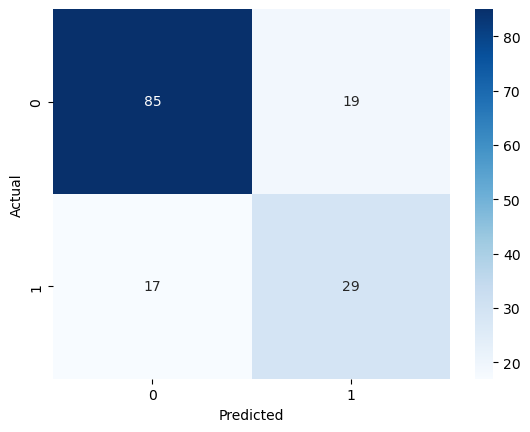

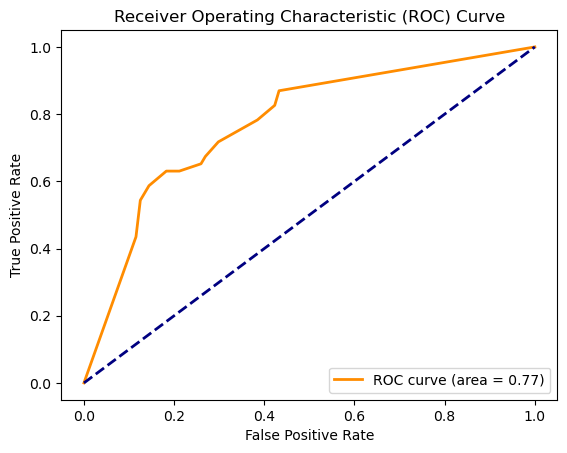

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = best_dt_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC curve and AUC
y_prob = best_dt_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

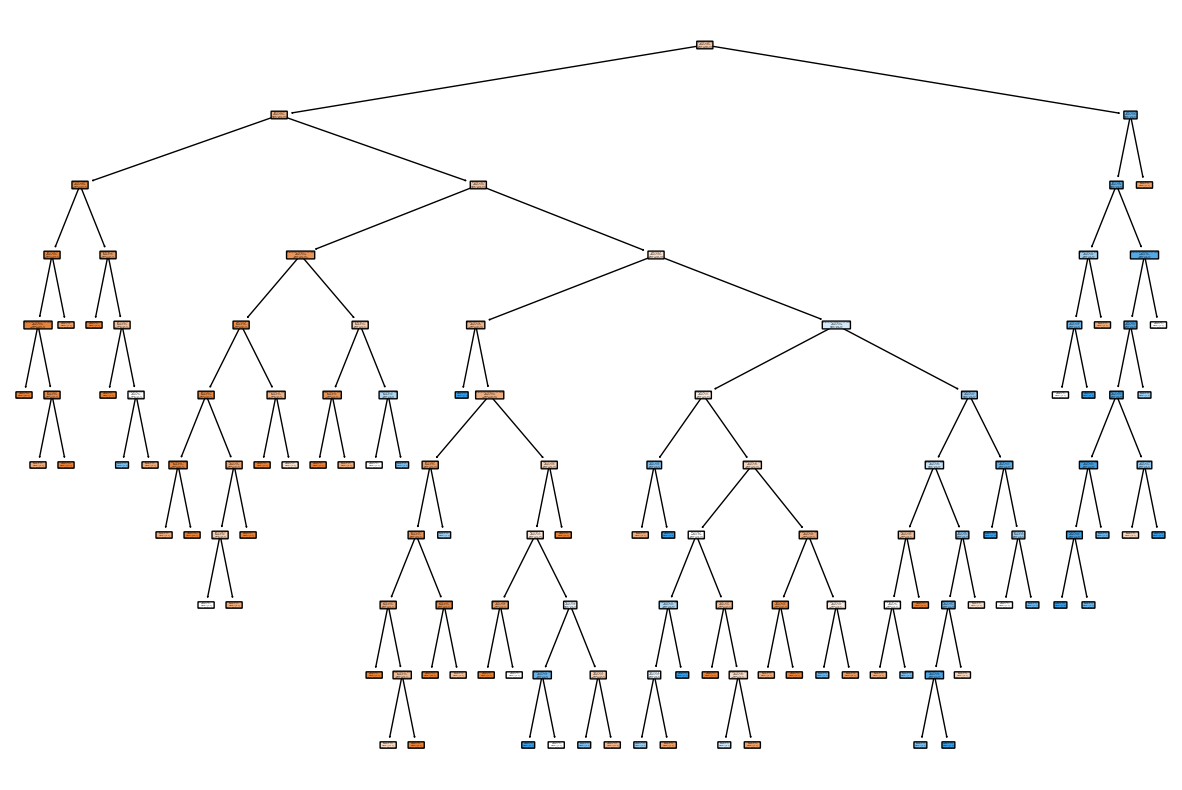

In [33]:
# Visualize the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(15, 10))
plot_tree(best_dt_model, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True, rounded=True)
plt.show()


Q7. Validate the decision tree model.

Validate the model on new data.

Perform sensitivity analysis and scenario testing to explore uncertainty and risks.

we can use the trained model (best_dt_model) to predict on new data and assess its performance. Sensitivity analysis involves testing the model's 
response to changes in input variables, and scenario testing involves evaluating its performance under different scenarios or conditions. This can help identify potential areas of risk or uncertainty in the model.